<a href="https://colab.research.google.com/github/robertramos89/Project2/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 2 - Part 1
- Robert Ramos
- 03/13/2022

In [ ]:
# Mount Data
from google.colab import drive
drive.mount('/content/drive');

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset - 2: Loan Approval Prediction


1.   Source of Data- https://www.kaggle.com/datasets/sonalisingh1411/loan-approval-prediction
2.   Brief description of Data- The dataset is from a financial instituition that wants to be able to predict in real time whether loans for homes get approved for their customers
3. What is the target? LoanStatus
4. Is this a classification or regression problem? Regression
5. How many features? 7
6. How many rows of data? 99,956
7. What, if any, challenges do you foresee in cleaning, exploring or modeling with this dataset? Since this is a large dataset cleaning this data up could be a challenge because of how many rows there are


## Data Dictionary
- 1.LoanID= Unique Loan ID 
- 2.Gender= Male/ Female
- 3.Married= Applicant married (Y/N)
- 4.Dependents= Number of dependents
- 5.Education= Applicant Education (Graduate/ Under Graduate) 
- 6.SelfEmployed= Self-employed (Y/N)
- 7.ApplicantIncome= Applicant income
- 8.CoapplicantIncome= Coapplicant income
- 9.LoanAmount= Loan amount in thousands
- 10.LoanAmountTerm= Term of the loan in months
- 11.CreditHistory= Credit history meets guidelines 
- 12.PropertyArea= Urban/ Semi-Urban/ Rural
- 13.LoanStatus= (Target) Loan approved (Y/N)

In [ ]:

# Load datasets
loan = '/content/Training Dataset.csv'

df_la = pd.read_csv(loan)
df_la.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df_la.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
# Check for duplicate rows
df_la.duplicated().sum()

0

In [ ]:
# Create variable to store column data types
data_types = df_la.dtypes
data_types

# filter variable to isolate object columns
string_cols = data_types[data_types == "object"].index
string_cols

# Create a loop to view unique values for each string column
for col in string_cols:
    print(f"- {col}:")
    print(df_la[col].value_counts())
    print("\n\n")

- Loan_ID:
LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64



- Gender:
Male      489
Female    112
Name: Gender, dtype: int64



- Married:
Yes    398
No     213
Name: Married, dtype: int64



- Dependents:
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64



- Education:
Graduate        480
Not Graduate    134
Name: Education, dtype: int64



- Self_Employed:
No     500
Yes     82
Name: Self_Employed, dtype: int64



- Property_Area:
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64



- Loan_Status:
Y    422
N    192
Name: Loan_Status, dtype: int64





In [ ]:
# No inconsistent values

## Handling Missing values

In [ ]:
# Run df.info to figure out which columns have missing data
df_la.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df_la[df_la.isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 13 rows have completely missing data and will be dropped from the dataset
# Since all 13 rows are missing gender I will drop all of these rows since the statement above also shows the same 13 rows

df_la = df_la.dropna(subset=['Gender'])

In [ ]:
# Drop Loan_ID column as it is just a unique identifier columns and will not affect out analysis
df_la = df_la.drop(columns='Loan_ID')

In [ ]:
# Run df.info to figure out which columns have missing data
df_la.isnull().sum()

Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df_la.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
df_la[df_la['LoanAmount'].isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
35,Male,Yes,0,Graduate,No,2275,2067.0,NaN,360.0,1.0,Urban,Y
63,Male,Yes,1,Graduate,No,4945,0.0,NaN,360.0,0.0,Rural,N
81,Male,Yes,1,Graduate,Yes,2395,0.0,NaN,360.0,1.0,Semiurban,Y
95,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,NaN,Urban,N
102,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
103,Male,Yes,0,Graduate,No,4652,3583.0,NaN,360.0,1.0,Semiurban,Y
113,Female,No,1,Graduate,Yes,7451,0.0,NaN,360.0,1.0,Semiurban,Y
127,Male,No,0,Graduate,No,3865,1640.0,NaN,360.0,1.0,Rural,Y
202,Male,Yes,3+,Not Graduate,No,3992,0.0,NaN,180.0,1.0,Urban,N


In [ ]:
df_la['LoanAmount'].median()

127.0

In [ ]:
# Fill Loan amount of mean value
mean_loan = df_la['LoanAmount'].median()
df_la['LoanAmount'].fillna(mean_loan,inplace=True)
df_la.isnull().sum()

Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
# Handle Nan Loan_Amount_term values
df_la['Loan_Amount_Term'].value_counts()

360.0    501
180.0     43
480.0     15
300.0     12
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [ ]:
# Fill Nan Loan amount terms to most frequent which is 360 months
df_la['Loan_Amount_Term'].fillna(360.0,inplace=True)

In [ ]:
df_la.isnull().sum()

Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       49
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df_la['Credit_History'].value_counts()

1.0    466
0.0     86
Name: Credit_History, dtype: int64

In [ ]:
# Fill null credit history with most frequent which is 1
df_la['Credit_History'].fillna(1.0,inplace=True)
df_la.isnull().sum()

Gender                0
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
# Fill null vlaues for self employed with most frequent option which is No
df_la['Self_Employed'].value_counts()

No     491
Yes     78
Name: Self_Employed, dtype: int64

In [ ]:
df_la['Self_Employed'].fillna('No',inplace=True)
df_la.isnull().sum()

Gender                0
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df_la['Dependents'].value_counts()

0     338
1     101
2      99
3+     48
Name: Dependents, dtype: int64

In [ ]:
# Fill in null value dependents with a string of Not Provided
df_la['Dependents'].fillna('Not Provided',inplace=True)
df_la.isnull().sum()

Gender               0
Married              3
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
df_la['Married'].value_counts()

Yes    388
No     210
Name: Married, dtype: int64

In [ ]:
# Fill in missing married status with most frequent which is Yes
df_la['Married'].fillna('Yes',inplace=True)

In [ ]:
# Check for additional missing values
df_la.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Produce univariate visuals for the target and all features

Text(0.5, 1.0, 'Count of Loan applications by Loan Amount')

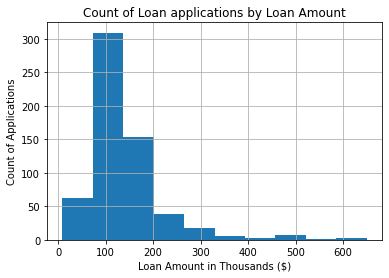

In [ ]:
# Univariate visual for count of loan applications by loan amount
df_la['LoanAmount'].hist()
plt.ticklabel_format(useOffset=False, style='plain')
plt.xlabel('Loan Amount in Thousands ($)')
plt.ylabel('Count of Applications')
plt.title('Count of Loan applications by Loan Amount')

Text(0.5, 1.0, 'Count of Loan applications by Gender')

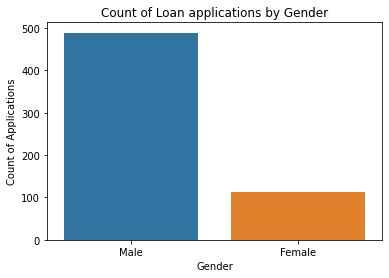

In [ ]:
# Count of Men vs Women applicants
sns.countplot(data=df_la,x='Gender')
plt.xlabel('Gender')
plt.ylabel('Count of Applications')
plt.title('Count of Loan applications by Gender')

Text(0.5, 1.0, 'Count of Loan applications by Marital Status')

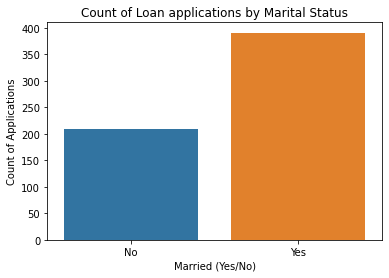

In [ ]:
# Count of Men vs Women applicants
sns.countplot(data=df_la,x='Married')
plt.xlabel('Married (Yes/No)')
plt.ylabel('Count of Applications')
plt.title('Count of Loan applications by Marital Status')

Text(0.5, 1.0, 'Count of Loan applications by Dependent Quantity')

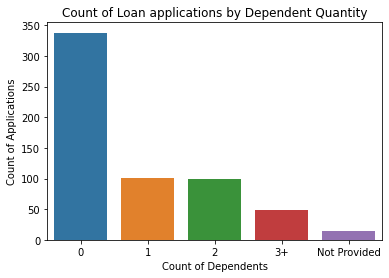

In [ ]:
# Count of Loan applications by Dependent Quantity
sns.countplot(data=df_la,x='Dependents')
plt.xlabel('Count of Dependents')
plt.ylabel('Count of Applications')
plt.title('Count of Loan applications by Dependent Quantity')

Text(0.5, 1.0, 'Count of Loan applications by Graduate Status')

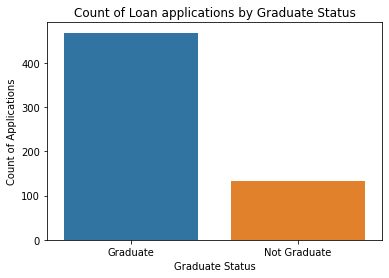

In [ ]:
# Count of applications by graduate status
sns.countplot(data=df_la,x='Education')
plt.xlabel('Graduate Status')
plt.ylabel('Count of Applications')
plt.title('Count of Loan applications by Graduate Status')

Text(0.5, 1.0, 'Count of Loan applications by Applicant Income')

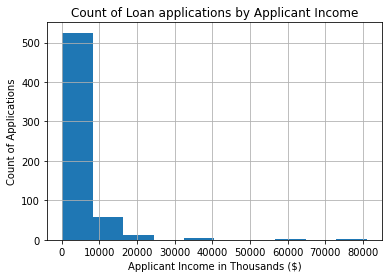

In [ ]:
# Count of applications by Application Income
df_la['ApplicantIncome'].hist()
plt.xlabel('Applicant Income in Thousands ($)')
plt.ylabel('Count of Applications')
plt.title('Count of Loan applications by Applicant Income')

Text(0.5, 1.0, 'Count of Loan applications by Applicant Income')

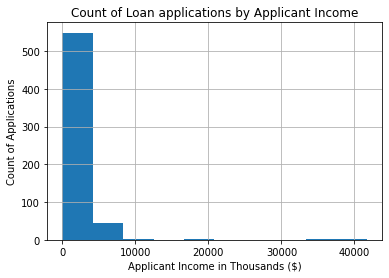

In [ ]:
# Count of applications by Coapplicant Income
df_la['CoapplicantIncome'].hist()
plt.xlabel('Applicant Income in Thousands ($)')
plt.ylabel('Count of Applications')
plt.title('Count of Loan applications by Applicant Income')

Text(0.5, 1.0, 'Count of Loan applications by Loan Amount Terms')

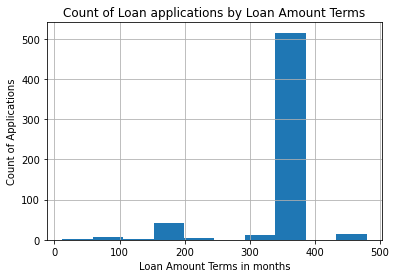

In [ ]:
# Count of applications by Coapplicant Income
df_la['Loan_Amount_Term'].hist()
plt.xlabel('Loan Amount Terms in months')
plt.ylabel('Count of Applications')
plt.title('Count of Loan applications by Loan Amount Terms')

Text(0.5, 1.0, 'Count of Loan applications by Loan Amount Terms')

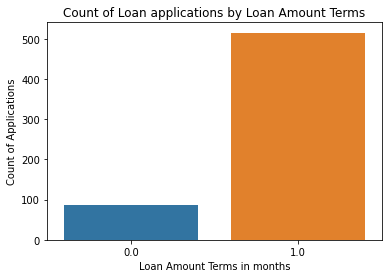

In [ ]:
# Count of applications by Credit History
sns.countplot(data=df_la,x='Credit_History')
plt.xlabel('Loan Amount Terms in months')
plt.ylabel('Count of Applications')
plt.title('Count of Loan applications by Loan Amount Terms')

Text(0.5, 1.0, 'Count of Loan applications by Property Area')

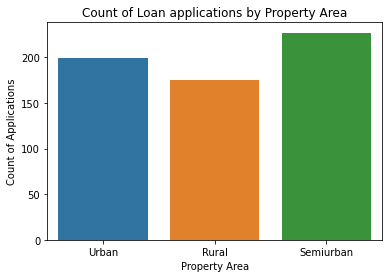

In [ ]:
# Count of applications by Property Area
sns.countplot(data=df_la,x='Property_Area')
plt.xlabel('Property Area')
plt.ylabel('Count of Applications')
plt.title('Count of Loan applications by Property Area')

Text(0.5, 1.0, '# of Loans approved vs denied')

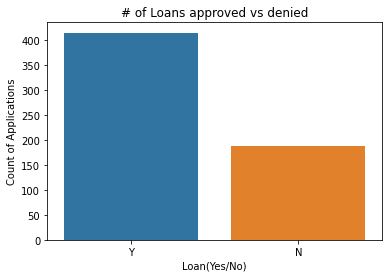

In [ ]:
# Approved vs denied Loan
sns.countplot(data=df_la,x='Loan_Status')
plt.xlabel('Loan(Yes/No)')
plt.ylabel('Count of Applications')
plt.title('# of Loans approved vs denied')

## Produce a correlation heatmap and identify any moderate or strong correlations between your target and your features and/or between one feature and another

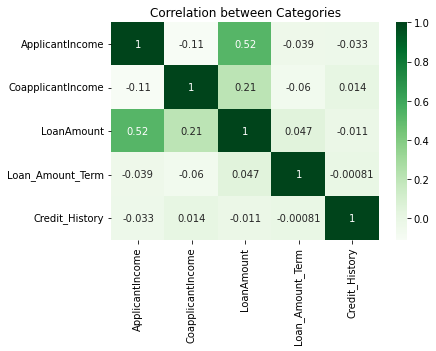

In [ ]:
corr = df_la.corr()
ax = sns.heatmap(corr,cmap="Greens",annot=True)
ax.set_title("Correlation between Categories");

In [ ]:
# The strongest correlation is between Loan Amount and income 
# next strongest correlation is between the Loan Amount and the co-applicant income